In [1]:
%matplotlib inline


# Ledoit-Wolf vs OAS estimation


The usual covariance maximum likelihood estimate can be regularized
using shrinkage. Ledoit and Wolf proposed a close formula to compute
the asymptotically optimal shrinkage parameter (minimizing a MSE
criterion), yielding the Ledoit-Wolf covariance estimate.

Chen et al. **proposed an improvement of the Ledoit-Wolf shrinkage
parameter, the OAS coefficient, whose convergence is significantly
better under the assumption that the data are Gaussian.**

This example, inspired from Chen's publication [1], shows a comparison
of the estimated MSE of the LW and OAS methods, using Gaussian
distributed data.

[1] "Shrinkage Algorithms for MMSE Covariance Estimation"
Chen et al., IEEE Trans. on Sign. Proc., Volume 58, Issue 10, October 2010.



In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz, cholesky

from sklearn.covariance import LedoitWolf, OAS

np.random.seed(0)

Automatically created module for IPython interactive environment


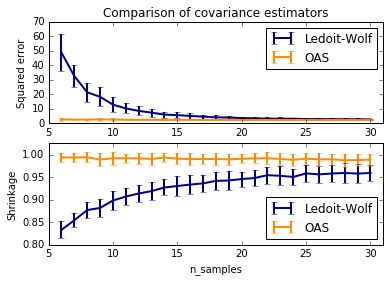

In [3]:
n_features = 100
# simulation covariance matrix (AR(1) process)
r = 0.1
real_cov = toeplitz(r ** np.arange(n_features))
coloring_matrix = cholesky(real_cov)

n_samples_range = np.arange(6, 31, 1)
repeat = 100
lw_mse = np.zeros((n_samples_range.size, repeat))
oa_mse = np.zeros((n_samples_range.size, repeat))
lw_shrinkage = np.zeros((n_samples_range.size, repeat))
oa_shrinkage = np.zeros((n_samples_range.size, repeat))
for i, n_samples in enumerate(n_samples_range):
    for j in range(repeat):
        X = np.dot(
            np.random.normal(size=(n_samples, n_features)), coloring_matrix.T)

        lw = LedoitWolf(store_precision=False, assume_centered=True)
        lw.fit(X)
        lw_mse[i, j] = lw.error_norm(real_cov, scaling=False)
        lw_shrinkage[i, j] = lw.shrinkage_

        oa = OAS(store_precision=False, assume_centered=True)
        oa.fit(X)
        oa_mse[i, j] = oa.error_norm(real_cov, scaling=False)
        oa_shrinkage[i, j] = oa.shrinkage_

# plot MSE
plt.subplot(2, 1, 1)
plt.errorbar(n_samples_range, lw_mse.mean(1), yerr=lw_mse.std(1),
             label='Ledoit-Wolf', color='navy', lw=2)
plt.errorbar(n_samples_range, oa_mse.mean(1), yerr=oa_mse.std(1),
             label='OAS', color='darkorange', lw=2)
plt.ylabel("Squared error")
plt.legend(loc="upper right")
plt.title("Comparison of covariance estimators")
plt.xlim(5, 31)

# plot shrinkage coefficient
plt.subplot(2, 1, 2)
plt.errorbar(n_samples_range, lw_shrinkage.mean(1), yerr=lw_shrinkage.std(1),
             label='Ledoit-Wolf', color='navy', lw=2)
plt.errorbar(n_samples_range, oa_shrinkage.mean(1), yerr=oa_shrinkage.std(1),
             label='OAS', color='darkorange', lw=2)
plt.xlabel("n_samples")
plt.ylabel("Shrinkage")
plt.legend(loc="lower right")
plt.ylim(plt.ylim()[0], 1. + (plt.ylim()[1] - plt.ylim()[0]) / 10.)
plt.xlim(5, 31)

plt.show()